Association rules : find relationship between set of elements from every distinct transaction.<br>
Collaborative filtering : find individual preference

Support : frequency of an itemset placed in all transactions.<br>
Low support = very little data to draw conclusion

```
Support{{X}} = (Transaction with X) / (All transactions)
```
Confidence : Probability of the occurrence of consequent in the basket<br>
High confidence = high probability that both are bought together. But can be deceived if amount of buying item Y is naturally huge compared to X e.g. bread and toothbrush
```
Confidence{{X}->{Y}} = (Transaction with X & Y) / (Transaction with X)
```
Lift : Likelihood of buying X and Y itemsets together as compared to the likelihood of just buying X. <br>
<br>

Equal Lift (Lift = 1) = no association.  <br>
Low lift (Lift < 1) = having X in the cart does not increase the probability of having Y = low association.<br>
High Lift (Lift > 1) = Y is more liklely to be bought by those who bought X as compared to those who only bought Y
```
Lift{{X}->{Y}} = Confidence{{X}->{Y}} / Support{{Y}}
```

Apriori algorithm: 

1. Explore itemsets (from 1 item to many) which in each layer (split by amount of item in itemset), itemset with support < min 
support (threshold) and their derivatives in the following layers will be dropped.
```
E.g. if Support{X,Y} < min_support or threshold, then {X,Y} and {X,Y,...} will be dropped too
```

2. From the list generated in Step 1, remove low probability combination and it's derivatives in each layer if confidence of itemset rules < min confidence
```
E.g. if Confidence{A,B,C ->D} < min_cinfidence or threshold, then {A,B,C ->D} and {(A,B,C)-> D,(A,B,C)} will be dropped too
```
3. Find itemset with high association by calculating lift

Max fequent itemset : a frequent itemset for which none of the immediate supersets are frequent.
```
E.g. {bread,butter} is max frequent itemset, if Support{bread,butter,any item} < min support
```


Closed frequent itemset: a frequent itemset for which none of the immediate supersets have the same value of support

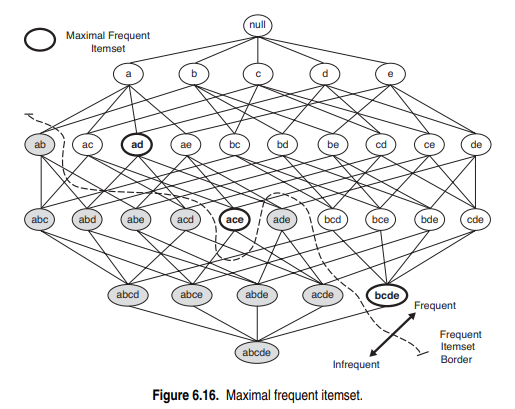

Collaborative Filtering:
* User based : Pearson correlation - user behavior similarity for rating prediction
* Item based : kNN model (k = 10~100) - item rating similarity for rating prediction

In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=0984a52ae9ff1e5a26a978a805745e4cd4c474551bde82b7c8baa7cc4f3bd162
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


# Import Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

# Load Data & Pre-Process

In [7]:
data = pd.read_csv('store_data.csv', header=None)

In [9]:
data.head()
# each row represents a transaction
# each col represents an item in a specific transaction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.shape

(7501, 20)

In [40]:
# generate list of list for apriori() input
transactions = []
for idx_transaction in range (data.shape[0]):
    basket = []
    for idx_item in range(data.shape[1]):
        item = data.iloc[idx_transaction, idx_item]
        if pd.isna(item) :
            continue
        basket.append(data.iloc[idx_transaction, idx_item])
    transactions.append(basket)

In [41]:
transactions[0:2]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs']]

# Train Model

In [47]:
rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
rules_result = list(rules)

In [50]:
len(rules_result)       # accepted associations

24

In [58]:
rules_result
# chichken and light cream are frequently bought together
# support=0.0045 means only 45 transactions with both items out of 10,000 total transactions
# confidence = 0.29 means only 29 transactions with both items out of 100 transactions with light cream
# lift = 4.84 means chicken is highly associated to light cream. 4.84 times more likely that both items are bought together compared to the likehood of chichken is bought

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [82]:
rules_result_processed = {}
for i in range(len(rules_result)):
    
    support = rules_result[i][1]
    base_item = ','.join(rules_result[i][2][0][0])
    added_item = ','.join(rules_result[i][2][0][1])
    confidence = rules_result[i][2][0][2]
    lift = rules_result[i][2][0][3]

    rules_result_processed[i] = [base_item, added_item, support, confidence, lift]

rules_result_processed

{0: ['light cream',
  'chicken',
  0.004532728969470737,
  0.29059829059829057,
  4.84395061728395],
 1: ['mushroom cream sauce',
  'escalope',
  0.005732568990801226,
  0.3006993006993007,
  3.790832696715049],
 2: ['pasta',
  'escalope',
  0.005865884548726837,
  0.3728813559322034,
  4.700811850163794],
 3: ['herb & pepper',
  'ground beef',
  0.015997866951073192,
  0.3234501347708895,
  3.2919938411349285],
 4: ['tomato sauce',
  'ground beef',
  0.005332622317024397,
  0.3773584905660377,
  3.840659481324083],
 5: ['whole wheat pasta',
  'olive oil',
  0.007998933475536596,
  0.2714932126696833,
  4.122410097642296],
 6: ['pasta',
  'shrimp',
  0.005065991201173177,
  0.3220338983050847,
  4.506672147735896],
 7: ['frozen vegetables,chocolate',
  'shrimp',
  0.005332622317024397,
  0.23255813953488375,
  3.2545123221103784],
 8: ['cooking oil,ground beef',
  'spaghetti',
  0.004799360085321957,
  0.5714285714285714,
  3.2819951870487856],
 9: ['spaghetti,frozen vegetables',
  'gr

In [85]:
result = pd.DataFrame.from_dict(rules_result_processed, orient='index', columns=['base_item', 'added_item', 'support', 'confidence', 'lift'])
result.sort_values(by=['lift'], ascending=False)
# sort by lift tells us the value added when added item is placed together with base item.
# support tells us how frequent/probable both are bought together to all transactions

,base_item,added_item,support,confidence,lift
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
6,pasta,shrimp,0.005066,0.322034,4.506672
5,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
17,"herb & pepper,spaghetti",ground beef,0.006399,0.393443,4.004360
16,"herb & pepper,mineral water",ground beef,0.006666,0.390625,3.975683
4,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
14,"spaghetti,frozen vegetables",tomatoes,0.006666,0.239234,3.498046
21,"soup,mineral water",olive oil,0.005199,0.225434,3.423030
